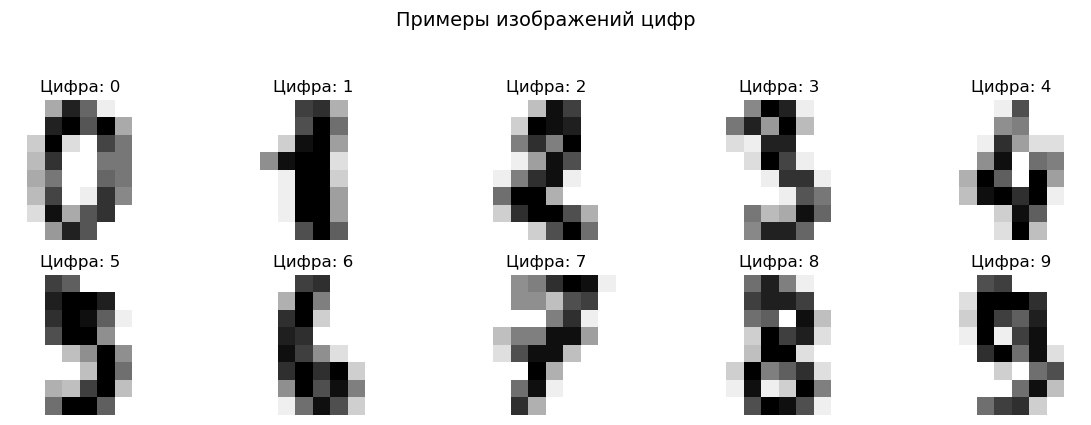


Обучение модели...
Обучение завершено. Итераций: 38

ОТЧЕТ О КЛАССИФИКАЦИИ:
              precision    recall  f1-score   support

           0     1.0000    0.9722    0.9859        36
           1     0.9211    0.9722    0.9459        36
           2     0.9722    1.0000    0.9859        35
           3     0.9730    0.9730    0.9730        37
           4     0.9474    1.0000    0.9730        36
           5     1.0000    1.0000    1.0000        37
           6     1.0000    1.0000    1.0000        36
           7     1.0000    1.0000    1.0000        36
           8     1.0000    0.8857    0.9394        35
           9     1.0000    1.0000    1.0000        36

    accuracy                         0.9806       360
   macro avg     0.9814    0.9803    0.9803       360
weighted avg     0.9814    0.9806    0.9804       360



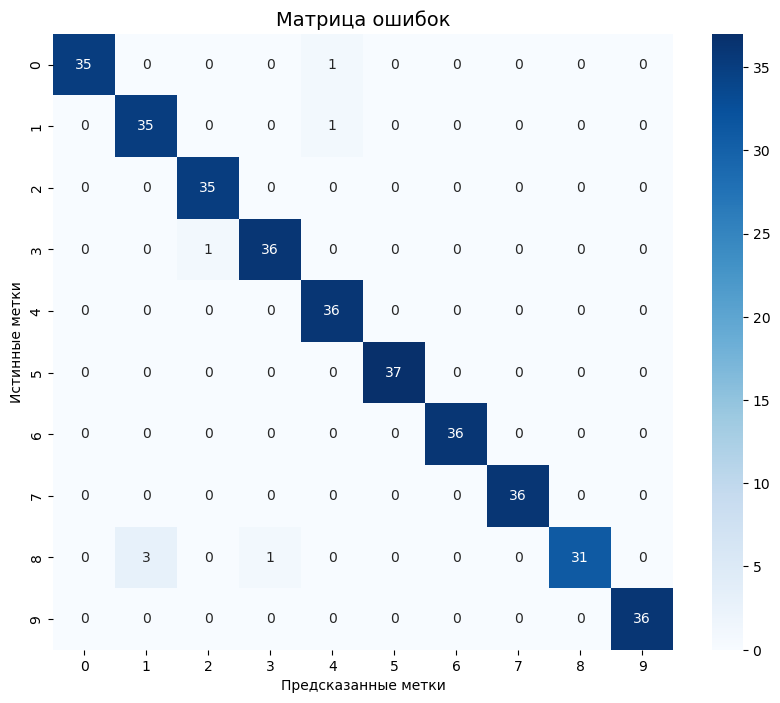


МЕТРИКИ ПО КЛАССАМ:
 Цифра  Precision   Recall  F1-Score  Поддержка
     0   1.000000 0.972222  0.985915       36.0
     1   0.921053 0.972222  0.945946       36.0
     2   0.972222 1.000000  0.985915       35.0
     3   0.972973 0.972973  0.972973       37.0
     4   0.947368 1.000000  0.972973       36.0
     5   1.000000 1.000000  1.000000       37.0
     6   1.000000 1.000000  1.000000       36.0
     7   1.000000 1.000000  1.000000       36.0
     8   1.000000 0.885714  0.939394       35.0
     9   1.000000 1.000000  1.000000       36.0


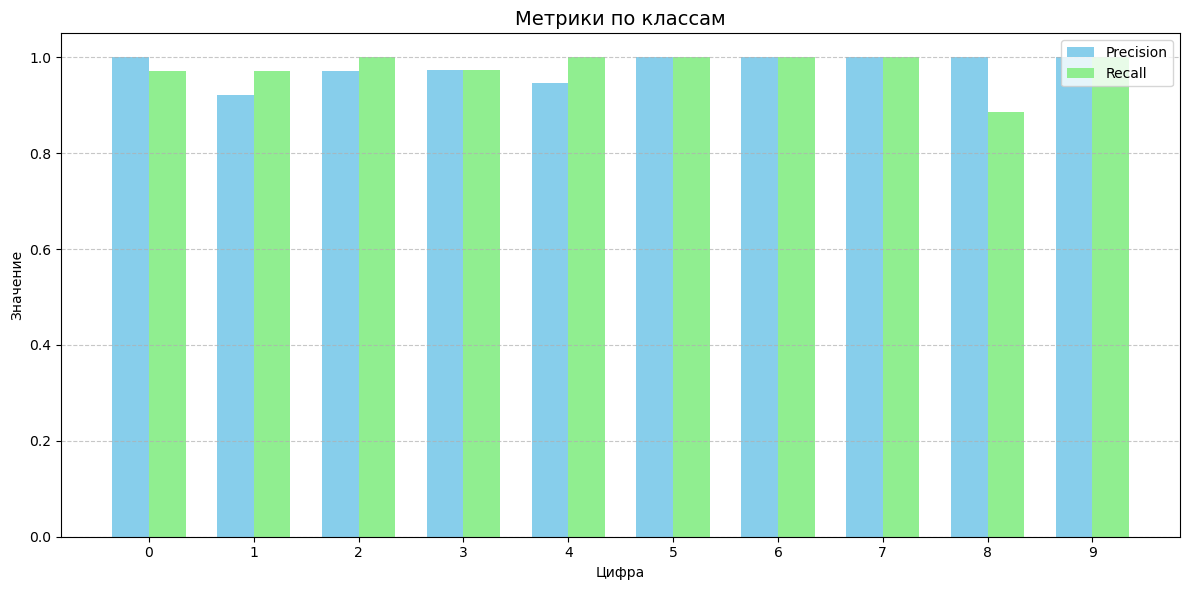

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report,
                             confusion_matrix)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def load_and_prepare_data():
    """Загрузка и подготовка данных цифр"""
    digits = load_digits()

    # Визуализация примеров
    plt.figure(figsize=(12, 4))
    plt.suptitle("Примеры изображений цифр", fontsize=14, y=1.05)
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(digits.images[i], cmap='gray_r')
        plt.title(f'Цифра: {digits.target[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    return train_test_split(
        digits.data, digits.target,
        test_size=0.2, random_state=42, stratify=digits.target
    )


def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    """Обучение и оценка модели классификации"""
    # Масштабирование данных
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Создание и обучение модели
    model = MLPClassifier(
        hidden_layer_sizes=(150, 100),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        batch_size=256,
        learning_rate='adaptive',
        max_iter=1000,
        early_stopping=True,
        validation_fraction=0.15,
        random_state=42
    )

    print("\nОбучение модели...")
    model.fit(X_train_scaled, y_train)
    print(f"Обучение завершено. Итераций: {model.n_iter_}")

    # Предсказания и оценка
    y_pred = model.predict(X_test_scaled)

    # Вывод метрик
    print("\nОТЧЕТ О КЛАССИФИКАЦИИ:")
    print("=" * 60)
    print(classification_report(y_test, y_pred, digits=4))
    print("=" * 60)

    # Матрица ошибок
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(10),
                yticklabels=range(10))
    plt.title('Матрица ошибок', fontsize=14)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.show()

    # Метрики по классам
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = []
    for digit in range(10):
        metrics.append([
            digit,
            report[str(digit)]['precision'],
            report[str(digit)]['recall'],
            report[str(digit)]['f1-score'],
            report[str(digit)]['support']
        ])

    print("\nМЕТРИКИ ПО КЛАССАМ:")
    print("=" * 70)
    print(pd.DataFrame(metrics,
                       columns=["Цифра", "Precision", "Recall", "F1-Score", "Поддержка"]).to_string(index=False))
    print("=" * 70)

    # Визуализация метрик по классам
    plt.figure(figsize=(12, 6))
    x = range(10)
    width = 0.35

    plt.bar(x, [report[str(d)]['precision'] for d in range(10)],
            width, label='Precision', color='skyblue')
    plt.bar([i + width for i in x], [report[str(d)]['recall'] for d in range(10)],
            width, label='Recall', color='lightgreen')

    plt.title('Метрики по классам', fontsize=14)
    plt.xlabel('Цифра')
    plt.ylabel('Значение')
    plt.xticks([i + width / 2 for i in x], range(10))
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


X_train, X_test, y_train, y_test = load_and_prepare_data()
train_and_evaluate_model(X_train, X_test, y_train, y_test)
